# TUnfoldDensity example with pyroot

In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.26/02


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5epr4ugi because the default path (/home/physicist/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')

0

In [3]:
#%jsroot

## Construct the Binning scheme

Set the axis ranges for the generator (m bins) and detector  (n bins) level distributions as well as the number of bins in each. *Note* that we are currently using twice as many detector bins as generator level bins as recommended by the TUnfold documenation. This condition $n ≥ m$ 
is in contrast to many common unfoldding algorithms which require $n = m$ however a notable example of an unfolding algorithm without that restriction is __[G. D’Agostini](arXiv:1010.0632)__.

In [4]:
ptBinsReco = array.array('d', [200,260,350,460,550,650,760,13000])
mBinsGen = array.array('d', [0,5,10,20,40,60,80,100,150,200,250,300,350,1000])
ptBinsGen = array.array('d', [200,260,350,460,550,650,760,13000])
mBinsReco =  array.array('d', [0,2.5,5,7.5,10,15,20,30,40,50,60,70,80,90,100,125,150,175,200,225,250,275,300,325,350,1000])

nptBinsReco = len(ptBinsReco) - 1
nmBinsReco = len(mBinsReco) - 1
nptBinsGen = len(ptBinsGen) - 1
nmBinsGen = len(mBinsGen) - 1

Instantiate the TUnfoldBinning Scheme. The "signal" node represents the generator level (coarser) binning whereas the "detector" node represents the (finer) input binning scheme. 

In [5]:
generatorBinning = ROOT.TUnfoldBinning("generator")
### Need coarser binning for signal
signalBinning = generatorBinning.AddBinning("signal")    
signalBinning.AddAxis("massgen",nmBinsGen,mBinsGen,
                        True, # needed for fakes
                        True # overflow bin
                        )
signalBinning.AddAxis("ptgen",nptBinsGen,ptBinsGen,
                        True, # needed for fakes
                        True # overflow bin
                        )

# X axis : generator binning is Signal : mgen * ptgen and Background : mrec * ptrec

xaxis =  array.array('d',[a for a in range(nmBinsGen *nptBinsGen + 1 )])
nx = len(xaxis)-1

print (xaxis)
print("There are {} (signal) generator level bins in the simple scheme".format(nx))
print("---------------------------------------------------------------")

print("signalBinning")
for i in range(len(signalBinning.GetDistributionBinning(0))):
    print (signalBinning.GetDistributionBinning(0)[i])

#print "detectorBinning"
#for i in xrange(len(backgroundBinning.GetDistributionBinning(0))):
#    print backgroundBinning.GetDistributionBinning(0)[i]
    
#print "Below counts include overflow and underflow bins"    
#print "There are {} signal {} background bins in the generator scheme".format(signalBinning.GetTH1xNumberOfBins() , backgroundBinning.GetDistributionNumberOfBins())
genBin = generatorBinning

array('d', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0,

In [6]:
detectorBinning = ROOT.TUnfoldBinning("detector") 
detectorDistribution=detectorBinning.AddBinning("detectordistribution")
detectorDistribution.AddAxis("mass",nmBinsReco,mBinsReco,
                        False, # no underflow bin (not reconstructed)
                        True # overflow bin
                        )
detectorDistribution.AddAxis("pt",nptBinsReco,ptBinsReco,
                        False, # no underflow bin (not reconstructed)
                        True # overflow bin
                        )

yaxis =  array.array('d',[a for a in range(nmBinsReco *nptBinsReco+1 )])
ny = len(yaxis)-1

print (yaxis)
print ("There are {}  detector level bins in the simple scheme".format(ny))
print ("detectorBinning")
for i in range(len(detectorDistribution.GetDistributionBinning(0))):
    print (detectorDistribution.GetDistributionBinning(0)[i])
    
print ("Below counts include overflow and underflow bins")
print ("There are {} bins in the detector scheme".format(detectorDistribution.GetTH1xNumberOfBins()))#GetDistributionNumberOfBins())
detBin  = detectorBinning

array('d', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0])
There are 91  detector level bins in the simple scheme
detectorBinning
0.0
5.0
10.0
20.0
40.0
60.0
80.0
100.0
150.0
200.0
250.0
300.0
350.0
1000.0
Below counts include overflow and underflow bins
There are 112 bins in the detector scheme


# Create Response Matrix and 1D input 

In [7]:


M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M")
M1 = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M+1#sigma")
M2 = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M-1#sigma")

h = detectorBinning.CreateHistogram("h")

hup = detectorBinning.CreateHistogram("hup")
hdn = detectorBinning.CreateHistogram("hdn")



htrue = generatorBinning.CreateHistogram("htrue")
htruef = detectorBinning.CreateHistogram("htruef")



## Generate the response matrix

Here, we have a respone matrix with 4 coarse and 8 fine bins (configurable). The variable of interest ($x$) ranges from 0 to 100. We assume the resolution on $x$ is 1.0, and that there is a systematic uncertainty "scale", which has an "up" and "down" variation of 2%. We generate 10000 pseudo-events for each value of x between 0 and 100, smeared by the resolution. For each of the "x" values, a reconstructed "y" value is constructed, again smeared by the resolution. We then add the "up" and "down" scale uncertainites. Finally, we construct TH2 matrices that represent the response matrices. 

In [8]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [9]:


nev = 100000 # 100000
xavg = 110.
yavg = 110.
xres = 1.
yres = 1.
gen2x = np.random.random(nev) * xavg
reco2x = np.random.randn(nev) * xres + gen2x
gen2y = np.random.random(nev) * yavg
reco2y = np.random.randn(nev) * yres + gen2y
#print mean(reco2y)

error_scaleUp = 1.10
error_scaleDn = 0.90

#gen2yu = np.random.random(nev) * yavg*scaleup
#reco2yu = np.random.randn(nev) * yres + gen2yu
reco2yu = error_scaleUp * reco2y
#print mean(reco2yu)

#gen2yd = np.random.random(nev) * yavg*scaledn
#recoreco2yu = -0.01 * reco2y
reco2yd = error_scaleDn* reco2y

#print mean(reco2yd)

#print reco2yd/reco2y
#reco2yu = np.random.randn(reco2y) * yres

gen2 = np.array( [gen2x,gen2y] ).T
reco2 = np.array( [reco2x,reco2y] ).T
r = np.array( [gen2x, gen2y, reco2x, reco2y] ).T

ru = np.array( [gen2x, gen2y, reco2x, reco2yu] ).T
rd = np.array( [gen2x, gen2y, reco2x, reco2yd] ).T



In [10]:
fname = '/mnt/data/cms/skims/zplusjets_skimmed_reco_gen_jet.root'

In [11]:
f = uproot.open(fname)

In [12]:
reco_jet_pt = f["Events"]["reco_jet_pt"].array()
reco_jet_mass = f["Events"]["reco_jet_mass"].array()
reco_jet_msoftdrop = f["Events"]["reco_jet_msoftdrop"].array()
gen_jet_pt = f["Events"]["gen_jet_pt"].array()
gen_jet_mass = f["Events"]["gen_jet_mass"].array()
gen_jet_msoftdrop = f["Events"]["gen_jet_msoftdrop"].array()

In [13]:




for i in range(len(reco_jet_pt)):
    yg = gen_jet_pt[i]
    xg = gen_jet_mass[i]
    yr = reco_jet_pt[i]
    xr = reco_jet_mass[i]
    
    yru = yr * 1.1
    yrd = yr * 0.9
    
    
    glob_recb= detectorDistribution.GetGlobalBinNumber(xr,yr)
    glob_genb= signalBinning.GetGlobalBinNumber(xg, yg)


    h.Fill(glob_recb)

    glob_recbU = detectorDistribution.GetGlobalBinNumber(xr , yru)
    glob_recbD = detectorDistribution.GetGlobalBinNumber(xr , yrd)
      
    M.Fill(glob_genb, glob_recb)#, #1./Npe)
    M1.Fill(glob_genb, glob_recbU)#, 1./Npe)
    M2.Fill(glob_genb, glob_recbD)#, 1./Npe)
    
    hup.Fill(glob_recbU)
    hdn.Fill(glob_recbD)

    
    
    htrue.Fill(glob_genb)
    glob_recb_GenObj = detectorDistribution.GetGlobalBinNumber(xg,yg)

    htruef.Fill(glob_recb_GenObj)
    
   

## Draw the response matrix

We draw the nominal and $\pm 1 \sigma$ variations. 

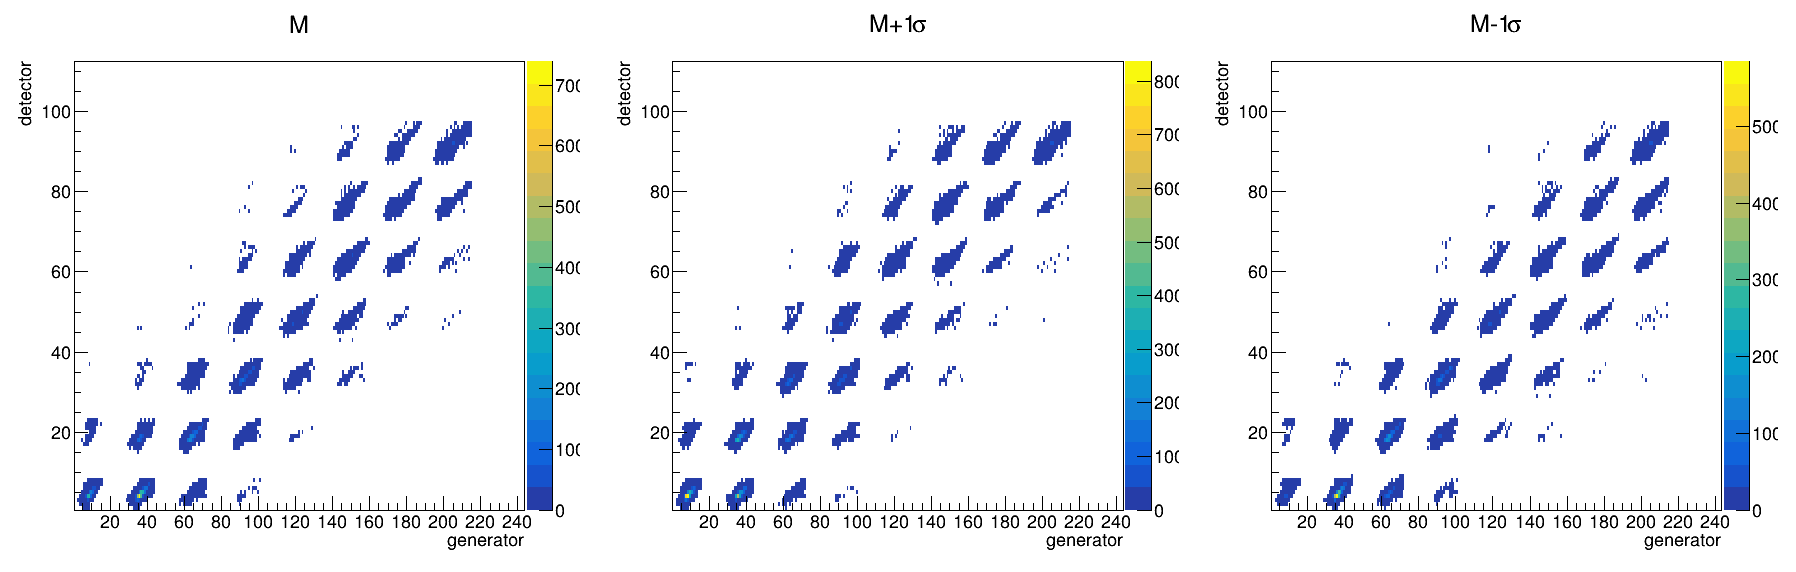

In [14]:

c0 = ROOT.TCanvas("c0", "c0", 1800, 600)
c0.Divide(3,1)
c0.cd(1)
M.Draw("colz")
c0.cd(2)
M1.Draw("colz")
c0.cd(3)
M2.Draw("colz")
c0.Draw()

## Draw the response matrix ratio

We draw the ratio of the $\pm 1 \sigma$ variations to the nominal. 

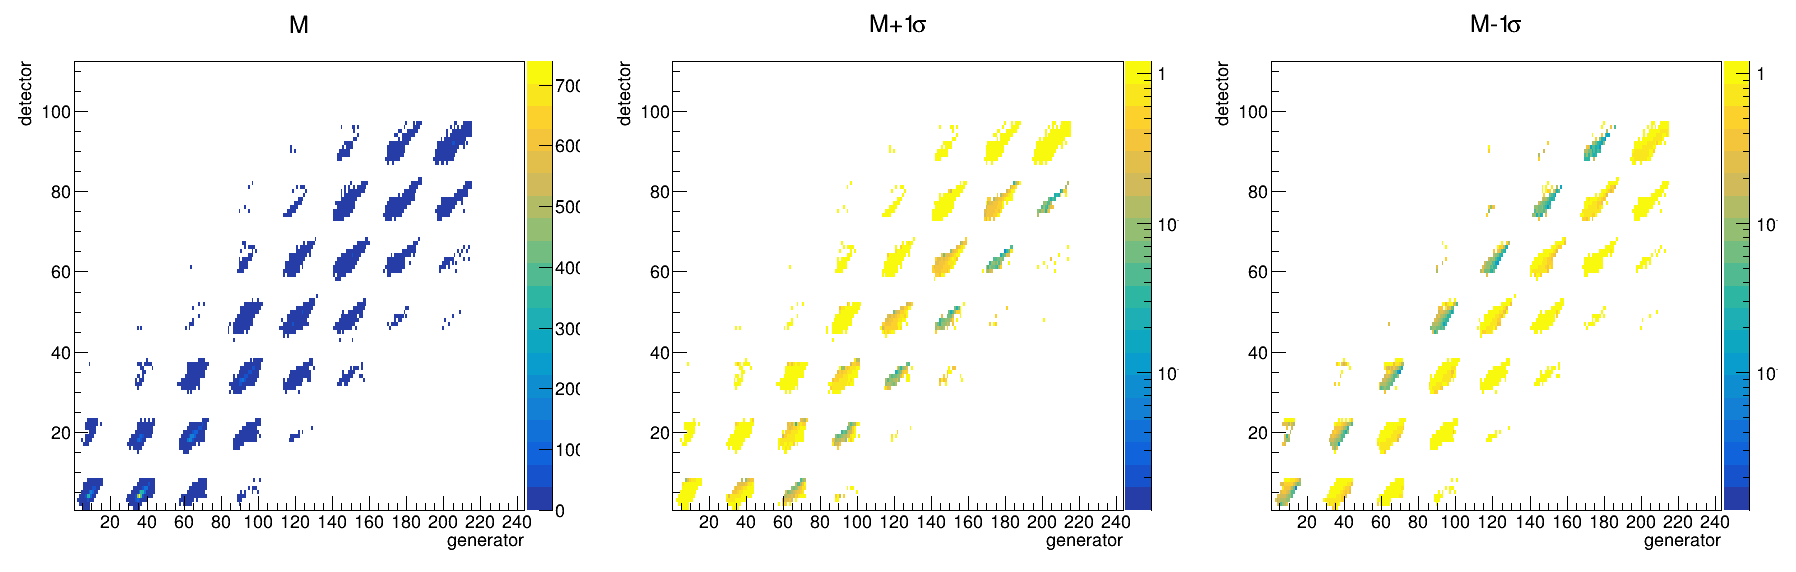

In [15]:
M1ratio = M1.Clone()
M1ratio.Divide(M)
M2ratio = M2.Clone()
M2ratio.Divide(M)
M1ratio.SetMaximum(1.2)
M2ratio.SetMaximum(1.2)

cratio = ROOT.TCanvas("cratio", "cratio", 1800, 600)
cratio.Divide(3,1)
cratio.cd(1)
M.Draw("colz")
cratio.cd(2)
M1ratio.Draw("colz")
ROOT.gPad.SetLogz()
cratio.cd(3)
M2ratio.Draw("colz")
ROOT.gPad.SetLogz()
cratio.Draw()

# Project Response Matrix onto X and Y axis 

In [16]:
h2 = M.ProjectionY("reco2")
htrue2 = M.ProjectionX("gen2")



## Plot the reconstructed and truth

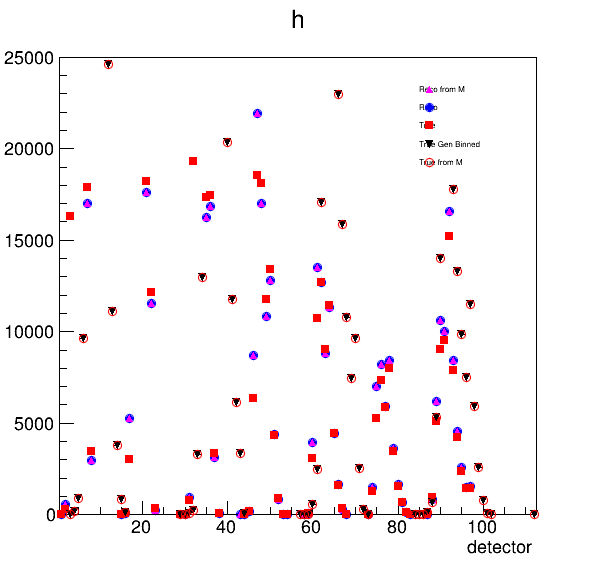

In [17]:
crec1 = ROOT.TCanvas("cr1", "creco", 600, 600)

htruef.SetLineColor(2)
h.SetMarkerStyle(20)
h.SetMarkerColor(ROOT.kBlue)
h2.SetMarkerStyle(22)
htruef.SetMarkerStyle(21)
htrue.SetMarkerStyle(23)
htrue2.SetMarkerStyle(24)


h2.SetMarkerColor(ROOT.kMagenta)

htruef.SetMarkerColor(ROOT.kRed)
htrue2.SetMarkerColor(ROOT.kRed)

h.SetLineColor(ROOT.kBlue)
htruef.SetLineColor(ROOT.kRed)
htrue.SetLineColor(ROOT.kBlack)
#htrue.SetLineColor(ROOT.kRed)

h.Draw('e ')



h.SetMinimum(.0)
h.SetMaximum(25000.)
#h.SetMinimum(.0)
#h.SetMaximum(2.)
h2.Draw('e same')


#h2U.Draw('e ')
#h.Draw('e same')
#hup.Draw("hist same ")
#hdn.Draw("hist same")
htruef.Draw("e same")
htrue.Draw("e same")
htrue2.Draw("e same")


leg1 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg1.SetBorderSize(0)
leg1.SetFillColor(0)
leg1.AddEntry( h2, 'Reco from M', 'p hist')
leg1.AddEntry( h, 'Reco', 'p hist')
#leg1.AddEntry( hup, '+1#sigma', 'l')
#leg1.AddEntry( hdn, '-1#sigma', 'l')
leg1.AddEntry( htruef, 'True', 'p hist')
leg1.AddEntry( htrue, 'True Gen Binned', 'p hist')
leg1.AddEntry( htrue2, 'True from M', 'p hist')

leg1.Draw()
crec1.Draw()

# Check that the matrix projections match the 1D input

In [18]:

h2U = M1.ProjectionY("reco2U")
h2D = M2.ProjectionY("reco2D")


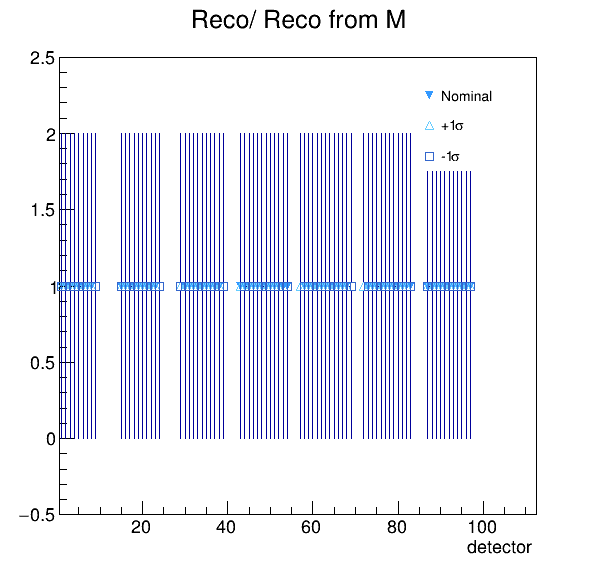

In [19]:
crecp = ROOT.TCanvas("crp", "", 600, 600)

hc = h.Clone("hc")
hc.Divide(h2.Clone())


hcu = hup.Clone("hcU")
hcu.Divide(h2U.Clone())

hcd = hdn.Clone("hcD")
hcd.Divide(h2D.Clone())

hc.SetTitle("Reco/ Reco from M")


hc.SetMarkerStyle(23)
hc.SetMarkerColor(ROOT.kAzure+1)

hcd.SetMarkerStyle(25)
hcd.SetMarkerColor(ROOT.kAzure-5)


hcu.SetMarkerStyle(26)
hcu.SetMarkerColor(ROOT.kAzure+6)


hc.Draw('e  ')
hcu.Draw('e same ')
hcd.Draw('e same ')
hc.SetMinimum(-.5)
hc.SetMaximum(2.5)


leg12p = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg12p.SetBorderSize(0)
leg12p.SetFillColor(0)

leg12p.AddEntry( hc, 'Nominal', 'p')
leg12p.AddEntry( hcu, '+1#sigma', 'p')
leg12p.AddEntry( hcd, '-1#sigma', 'p')

leg12p.Draw()

crecp.Draw()

# Plot the Up and Down Variations to Reco

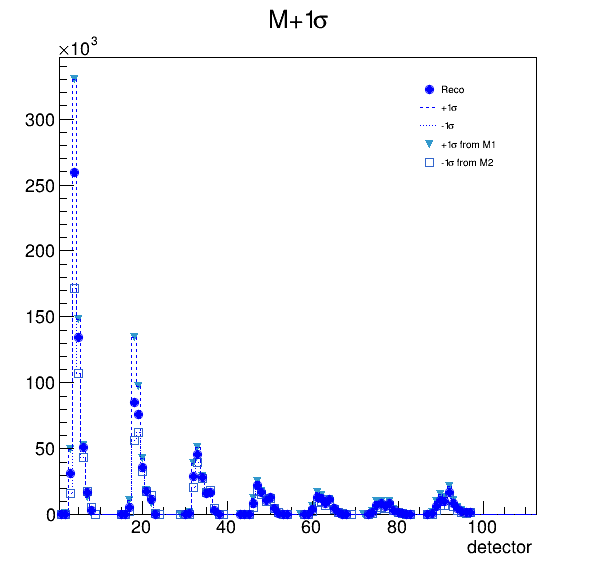

In [20]:
crec2 = ROOT.TCanvas("cr2", "", 600, 600)

h.SetMarkerStyle(20)
h.SetMarkerColor(ROOT.kBlue)

hup.SetLineStyle(2)
hdn.SetLineStyle(3)
hup.SetLineColor(ROOT.kBlue)
hdn.SetLineColor(ROOT.kBlue)

#htrue2U = M1.ProjectionX("gen2U")
h2U.SetMarkerStyle(23)
h2U.SetMarkerColor(ROOT.kAzure+5)

h2D.SetMarkerStyle(25)
h2D.SetMarkerColor(ROOT.kAzure-5)



h2U.Draw('e ')

h2U.SetMinimum(.0)
hup.Draw("hist same")


hdn.Draw("hist same ")



h2D.Draw('e same ')
h.Draw('e same ')


leg12 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg12.SetBorderSize(0)
leg12.SetFillColor(0)

leg12.AddEntry( h, 'Reco', 'p')
leg12.AddEntry( hup, '+1#sigma', 'l')
leg12.AddEntry( hdn, '-1#sigma', 'l')
leg12.AddEntry( h2U, '+1#sigma from M1', 'p')
leg12.AddEntry( h2D, '-1#sigma from M2', 'p')

leg12.Draw()

crec2.Draw()

## Unfold

1. Create the `TUnfoldDensity` object. 
1. Add the systematic uncertainty variations via `AddSysError`. 
1. Perform the regularization by scanning the L curve. 
1. Get the output. **Note! This does not account for systematic uncertainties automatically. They must be added by hand.**
1. Draw unfolded versus true distributions (in the same coarse binning scheme). 

In [21]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)

u = ROOT.TUnfoldDensity(M,orientation,regMode,con)


Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 96 output bins do not depend on the input data  0-2 17-28 45-56 74-83 103-111 133-140 161-167 189-194 216-244
Info in <TUnfold::TUnfold>: 112 input bins and 149 output bins
Error in <TUnfold::TUnfold>: too few (ny=112) input bins for nx=149 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:generator[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (xaxis:generator[0.5,1.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #2 (xaxis:generator[1.5,2.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #17 (xaxis:generator[16.5,17.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #18 (xaxis:generator[17.5,18.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #19 (xaxis:generator[18.5,19.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:generator[19.5,20.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #21 (xaxis

In [22]:
u.SetInput( h )


41

Warning in <TUnfoldDensity::SetInput>: 41/112 input bins have zero error, and are ignored.


In [23]:

u.AddSysError(M1, "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)


In [24]:

u.AddSysError(M2, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)


In [25]:

u.DoUnfold(0.0)

0.9979930696598135

Error in <TUnfoldDensity::GetInputInverseEmatrix>: number of parameters 149 > 71 (rank of input covariance). Problem can not be solved
Info in <TUnfoldDensity::InvertMSparseSymmPos>: cholesky-decomposition failed, try eigenvalue analysis
Warning in <TUnfoldDensity::DoUnfold>: rank of matrix E 71 expect 149
Info in <TUnfoldDensity::InvertMSparseSymmPos>: cholesky-decomposition failed, try eigenvalue analysis
Warning in <TUnfoldDensity::DoUnfold>: rank of output covariance is 71 expect 149


In [26]:
# Get output... DOES NOT CONTAIN SYSTEMATICS. 
o = u.GetOutput("o")
#o = u.GetOutput("unfolded","","signal", "*[b]", False)
 

In [27]:
# Get systematic shifts of output
o_up = u.GetDeltaSysSource("Up", "o_upshift", "M+1#sigma")
o_dn = u.GetDeltaSysSource("Dn", "o_dnshift", "M-1#sigma")
o_up.SetLineStyle(2)
o_dn.SetLineStyle(2)


### Stupid hack to get systematic covariances

The interface to TUnfold doesn't support direct access to the systematic covariances. 

In [28]:
cov_syssource_up = u.GetEmatrixSysUncorr("cov_syssource_up")
cov_syssource_dn = u.GetEmatrixSysUncorr("cov_syssource_dn")

In [29]:
u.GetEmatrixSysSource(cov_syssource_up, "Up")
u.GetEmatrixSysSource(cov_syssource_dn, "Dn")

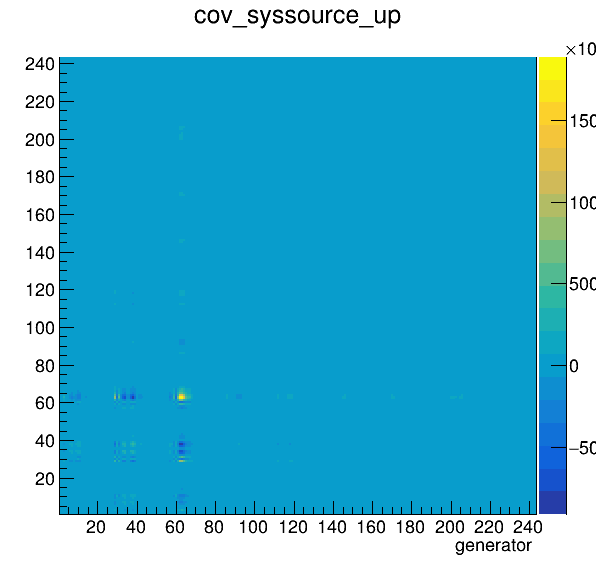

In [30]:
cov_syssource_up.Draw("colz")
ROOT.gPad.Draw()

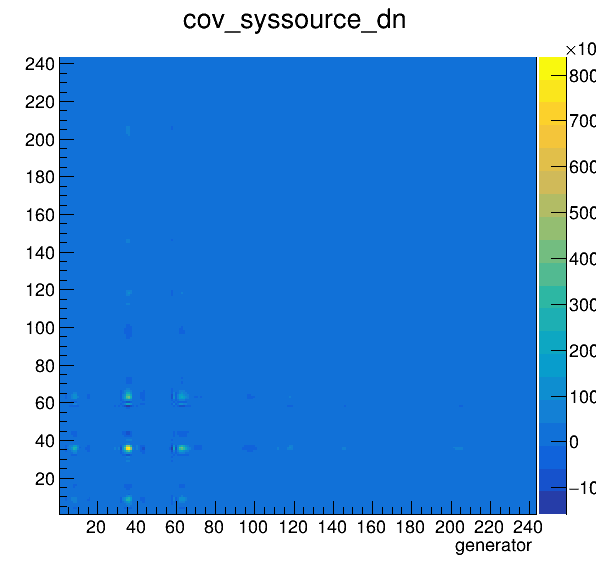

In [31]:
cov_syssource_dn.Draw("colz")
ROOT.gPad.Draw()

243


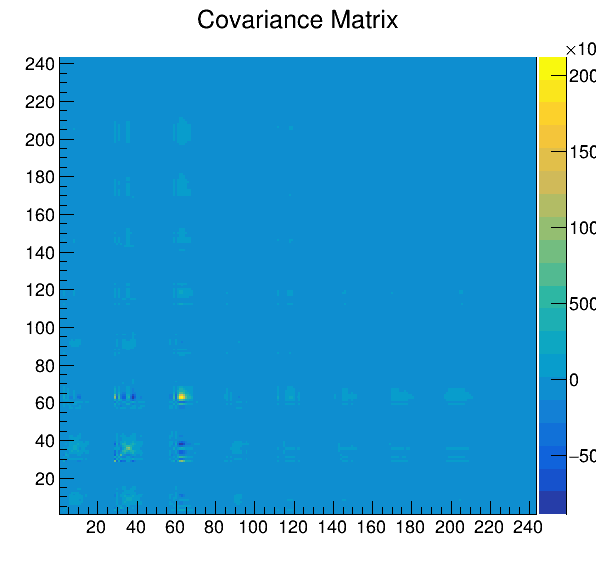

In [32]:
# Get various covariances
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
print(cov.GetNbinsX())
cov.Draw("colz")
ROOT.gPad.Draw()
#cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

In [33]:
cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")


#cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties", "signal", "*[]", False)
#cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data", "signal", "*[]", False)

In [34]:

# Now prepare various distributions. 
o_unfunc = o.Clone("o_unc")        # Unfolding and stat unc
o_sys = o.Clone("o_sys")        # Syst uncertainty
o_unctot = o.Clone("o_unctot")  # Total uncertainty
o_sys.SetLineStyle(2)


In [35]:

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output
o_origErrors = o.Clone("o_origErrors")
o_origJustErrors = o.Clone("o_origErrors")

for i in range( 0, o_up.GetNbinsX() + 1):
    unc_tot = ROOT.TMath.Sqrt( cov.GetBinContent(i,i) )
    o_unctot.SetBinContent(i, unc_tot )   
    oe = o.GetBinError(i)
    o_origJustErrors.SetBinContent(i, oe)    
    o.SetBinError(i, unc_tot )
    
    yup = abs( o_up.GetBinContent(i))
    ydn = abs( o_dn.GetBinContent(i))
    dy = ROOT.TMath.Sqrt( (yup**2 + ydn**2) )
    o_sys.SetBinContent(i, dy )






In [36]:
#htrue2 = htrue.Clone("h2")
#htrue2.Rebin(finebins/coarsebins)
o.SetMarkerStyle(20)
o.SetMarkerColor(1)
o_origErrors.SetMarkerStyle(21)
o_origErrors.SetMarkerColor(3)
o_unfunc.SetMarkerStyle(0)
o_unfunc.SetLineColor(2)
htrue.SetMarkerStyle(21)
htrue.SetMarkerColor(4)
htrue.SetMarkerStyle(4)
htrue.SetLineColor(4)



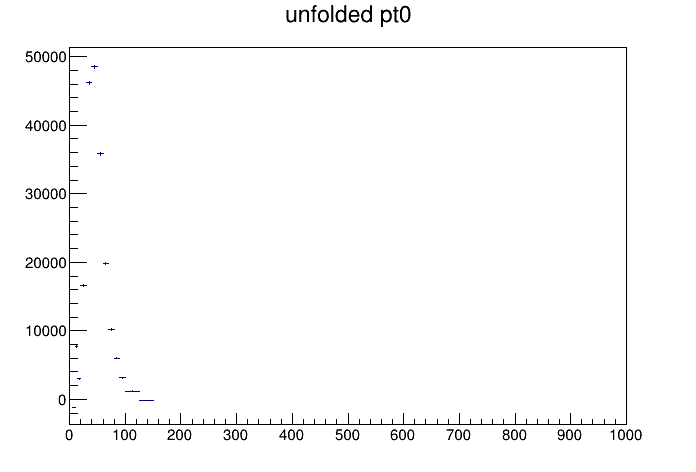

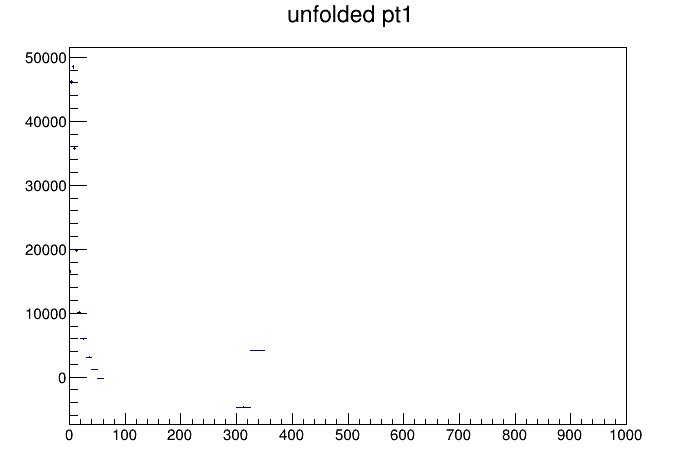

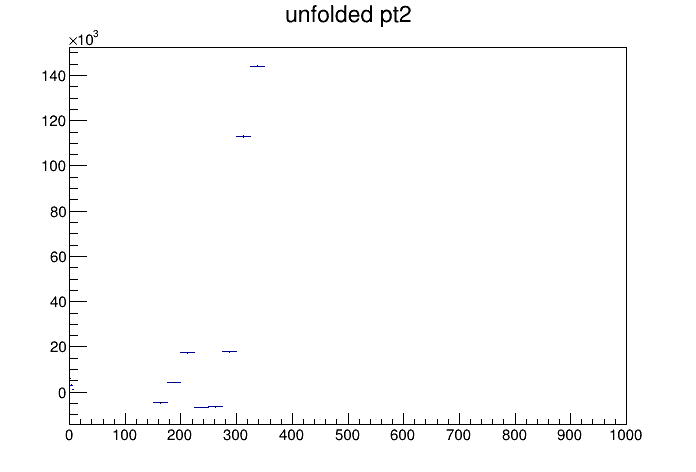

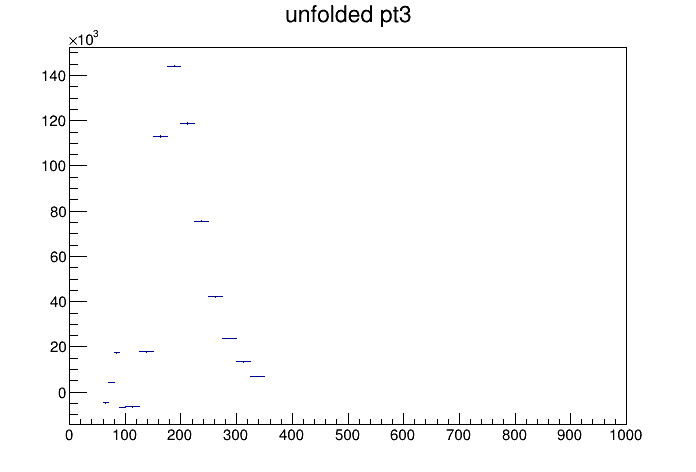

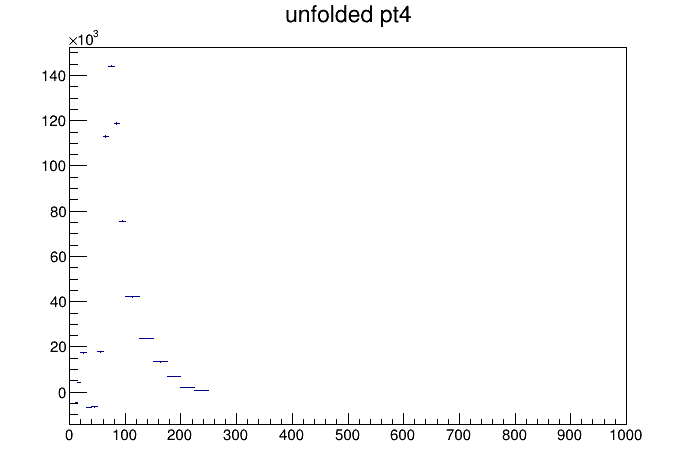

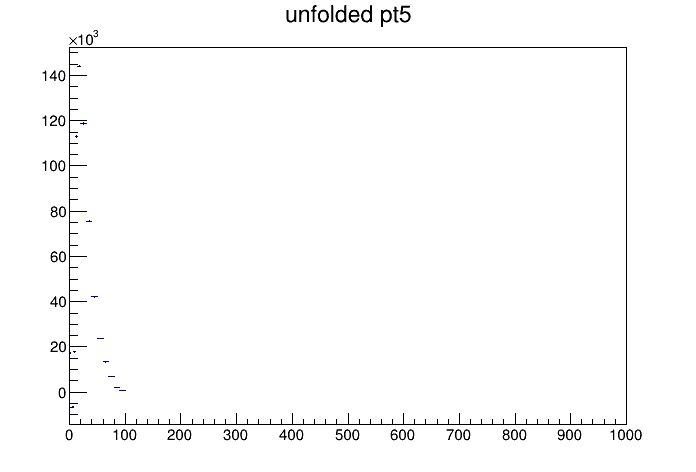

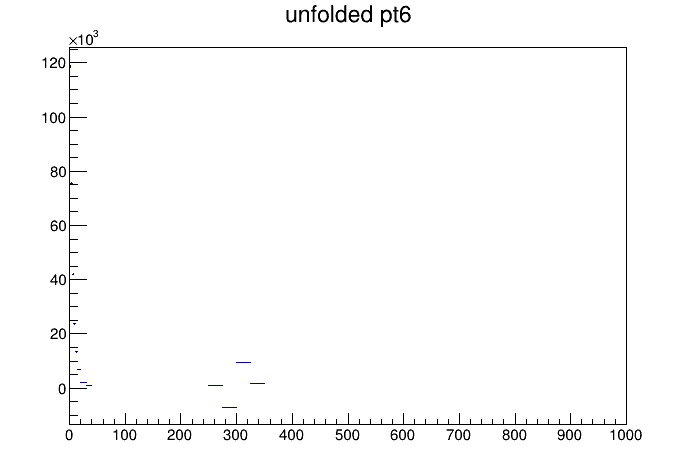

In [70]:
canvs = []
hists = []
for ipt in range(nptBinsGen): 
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    hcopy = ROOT.TH1F("unfolded_pt" + str(ipt), "unfolded pt" + str(ipt), nmBinsGen, mBinsGen )
    for im in range(nmBinsGen):
        hcopy.SetBinContent(im, o.GetBinContent(im + ipt * (nptBinsGen-1))) 
    hcopy.Draw("e")
    ci.Draw()
    canvs.append(ci)
    hists.append(hcopy)

243


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


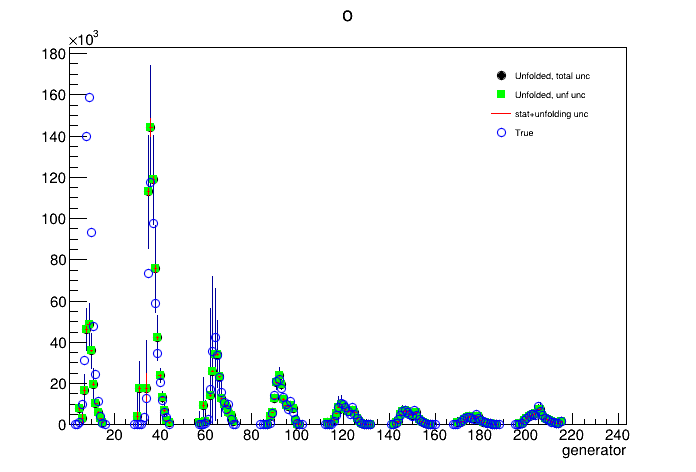

In [58]:
c = ROOT.TCanvas("c","c")
#o.SetMinimum(0.0)
#o.SetMaximum(1.0)

o.Draw()
print (o.GetNbinsX())
o_origErrors.Draw("e same")
o_unfunc.Draw("e same")
htrue.Draw("e same")

leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry( o, "Unfolded, total unc",'p')
leg2.AddEntry( o_origErrors, "Unfolded, unf unc",'p')

leg2.AddEntry( o_unfunc, "stat+unfolding unc",'l')
leg2.AddEntry( htrue, "True",'p')
leg2.Draw()
o.SetMinimum(0)
c.Draw()

# Normalized cross section

#### Make Jacobian matrix

In [38]:
J = ROOT.TMatrixD( o.GetNbinsX(), o.GetNbinsX() )
ROOT.makeJacobian2Dfrom1D(nmBinsGen, nptBinsGen, o, J)

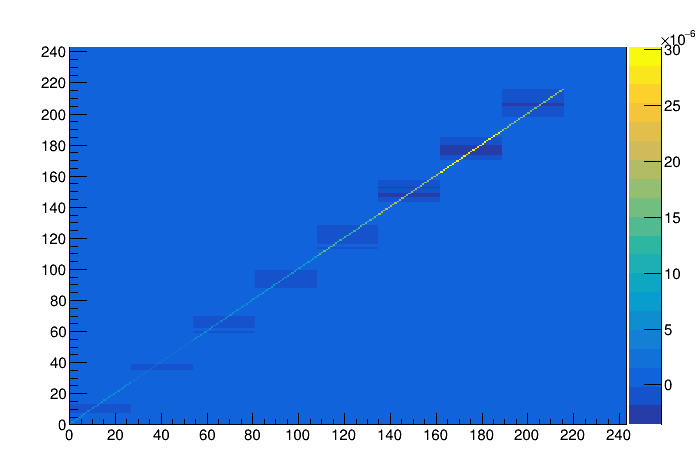

In [39]:
J.Draw("colz")
ROOT.gPad.Draw()
#ROOT.gPad.SetLogz()

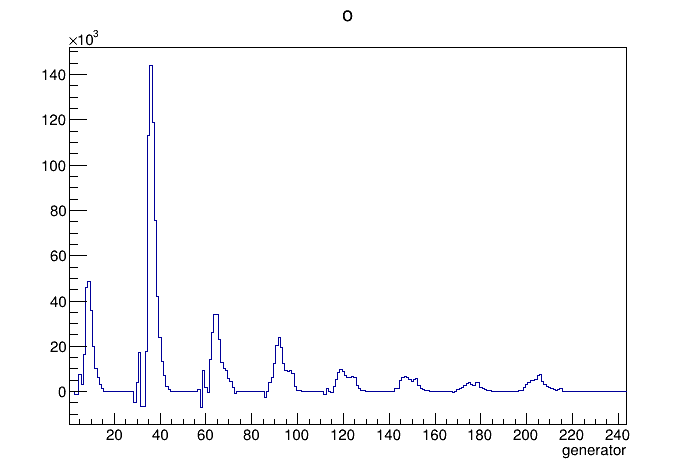

In [40]:
o_norm = o.Clone("o_norm")
o_norm.Draw("hist")
ROOT.gPad.Draw()

In [41]:
for i_ptBins in range (0, nptBinsGen+2):
    print (i_ptBins)
    counter = i_ptBins*(nmBinsGen+2)
    low_bin = 1+counter
    high_bin = counter+nptBinsGen+2
    sum_ptbin = o.Integral(low_bin,high_bin)
    if sum_ptbin > 0.0:
        for j_obins in range(low_bin,high_bin+1):
            o_norm.SetBinContent(j_obins,o.Integral(j_obins,j_obins)/sum_ptbin)

0
1
2
3
4
5
6
7
8


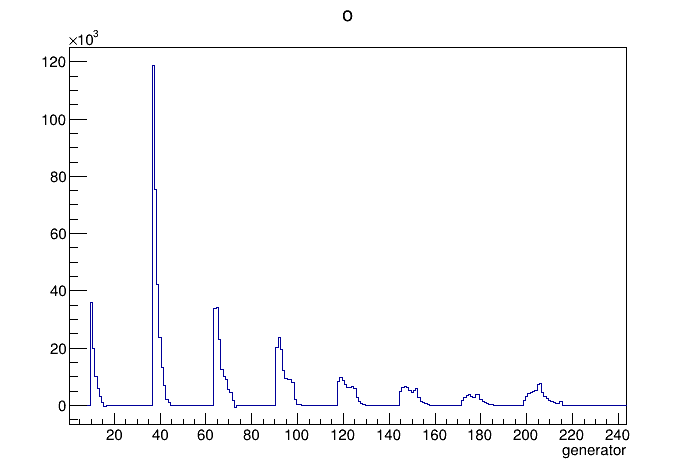

In [42]:
o_norm.Draw("hist")
ROOT.gPad.Draw()

#### Construct covariance TMatrixD

In [43]:
cov_m = ROOT.TMatrixD( o.GetNbinsX(), o.GetNbinsX() )
for xbin in range(1, cov.GetNbinsY() ):
    for ybin in range(1,cov.GetNbinsX() ):
        cov_m[xbin][ybin] = cov.GetBinContent( ybin, xbin)

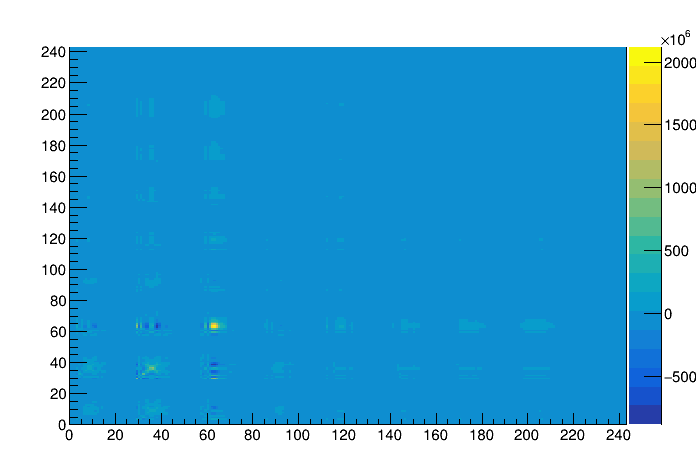

In [44]:
cov_m.Draw("colz")
ROOT.gPad.Draw()

In [45]:
covnorm_temp = ROOT.TMatrixD( cov_m, ROOT.TMatrixD.kMultTranspose, J)
covnorm = ROOT.TMatrixD(J, ROOT.TMatrix.kMult, covnorm_temp )

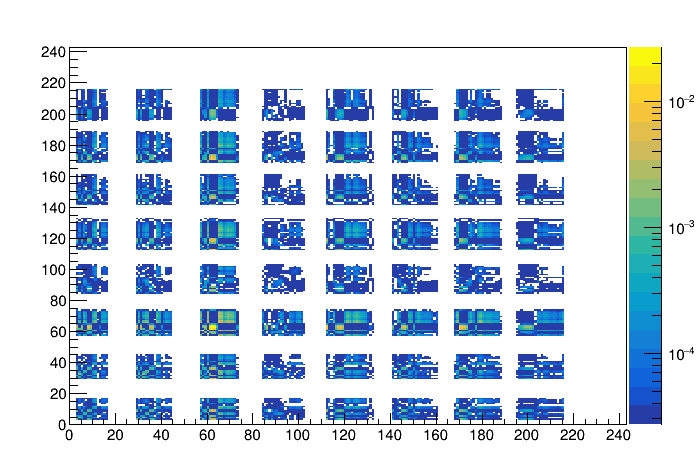

In [46]:
covnorm.Draw("colz")
ROOT.gPad.Draw()
ROOT.gPad.SetLogz()

In [47]:
# Now prepare various distributions. 
o_norm = o.Clone("o_norm")

o_norm.Scale(1.0 / o_norm.Integral() )
o_unfunc_norm = o_unfunc.Clone("o_unc_norm")        # Unfolding and stat unc
o_sys_norm = o_norm.Clone("o_sys_norm")        # Syst uncertainty
o_unctot_norm = o_norm.Clone("o_unctot_norm")  # Total uncertainty
o_sys_norm.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output
for i in range( 0, o_norm.GetNbinsX() ):
    unc_tot_norm = ROOT.TMath.Sqrt( covnorm[i][i] )
    o_unctot_norm.SetBinContent(i, unc_tot_norm )    
    o_norm.SetBinError(i, unc_tot_norm )

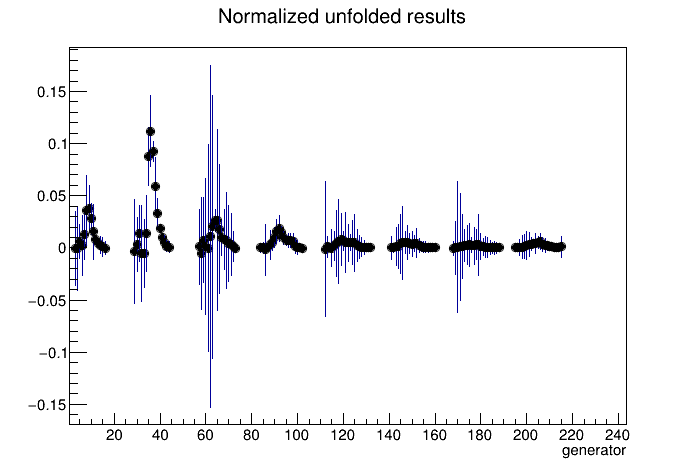

In [48]:
o_norm.SetTitle("Normalized unfolded results")
o_norm.Draw()
ROOT.gPad.Draw()

## Plot closure

The closure plot is the true distribution divided by the unfolded distribution. Aside from the outermost bins, the closure is consistent with unity. 

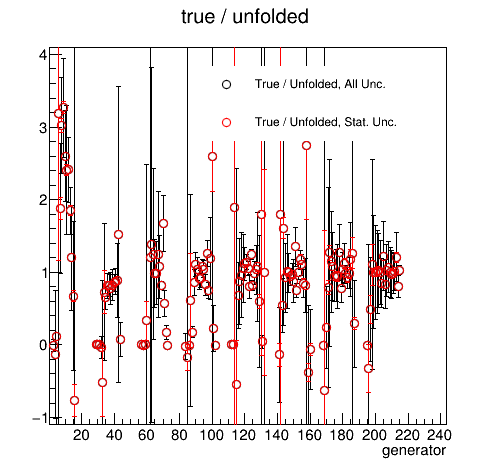

In [49]:
c2 = ROOT.TCanvas("c2", "c2", 500, 500)
closure = htrue.Clone("closure")
closure2 = htrue.Clone("closure2")
closure.SetMarkerColor(1)
closure.SetLineColor(1)
closure2.SetMarkerColor(2)
closure2.SetLineColor(2)
closure.SetTitle("true / unfolded")
closure.Divide(o)
closure2.Divide(o_unfunc)
closure.Draw('e1')
closure2.Draw('e1 same')
closure.SetMaximum(4.1)
closure.SetMinimum(-1.1)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry( closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry( closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

## Plot the total covariance matrix

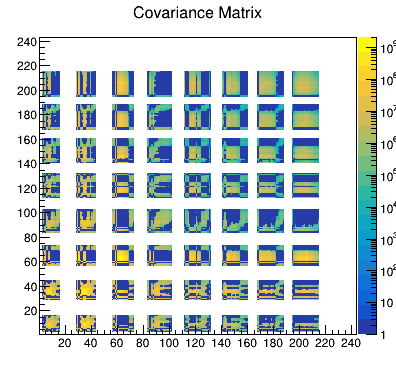

In [50]:

ccov = ROOT.TCanvas("ccov", "Covariance Matrix", 400, 400)
cov.Draw('colz')
ccov.SetLogz()
ccov.Draw()


## Plot the covariance matrix from uncorrelated (stat.) uncertainties

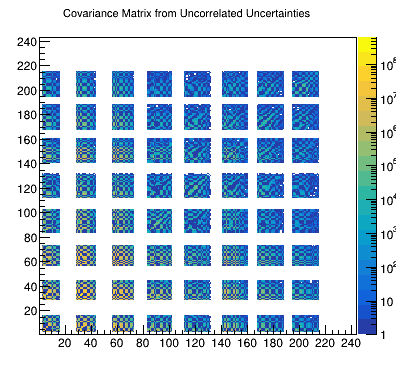

In [51]:

ccov_uncorr = ROOT.TCanvas("ccov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties", 400, 400)
cov_uncorr.Draw('colz')
ccov_uncorr.SetLogz()
ccov_uncorr.Draw()



## Plot covariance matrix of the statistical uncertainties from the input data

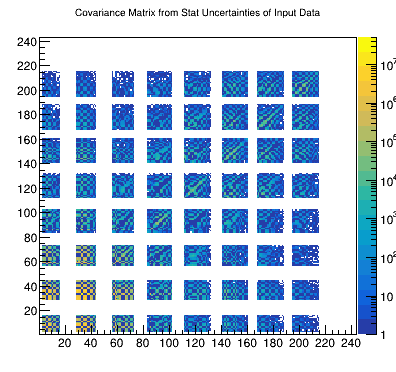

In [52]:

ccov_uncorr_data = ROOT.TCanvas("ccov_uncorr_data", "Covariance Matrix from Uncorrelated Uncertainties", 400, 400)
cov_uncorr_data.Draw('colz')
ccov_uncorr_data.SetLogz()
ccov_uncorr_data.Draw()



## Plot fractional uncertainties



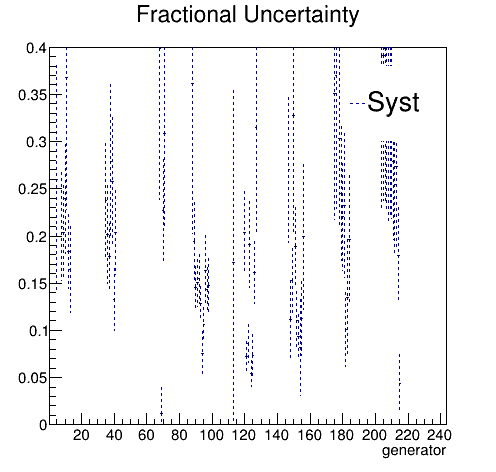

In [53]:

o_fracUnc = o_sys.Clone()
o_fracUnc.Divide(o.Clone())

o_fracUnc.SetTitle("Fractional Uncertainty")

c_sysf = ROOT.TCanvas("c_sys", "c_sys", 500, 500)
o_fracUnc.Draw("e")

o_fracUnc.SetMinimum(0.)
o_fracUnc.SetMaximum(.4)

legsysf = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
legsysf.SetFillColor(0)
legsysf.SetBorderSize(0)

legsysf.AddEntry( o_fracUnc, 'Syst', 'l')
legsysf.Draw()
c_sysf.Draw()

## Plot absolute uncertainties


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_sys


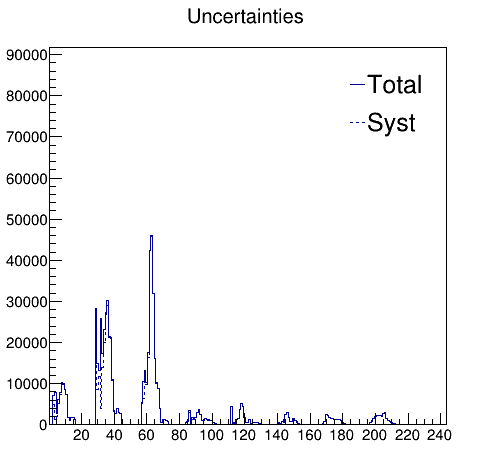

In [54]:
unc_stack = ROOT.THStack("unc_stack", "Uncertainties")
unc_stack.Add( o_unctot, "hist" )
unc_stack.Add( o_sys, "hist" )
#o_up.Divide(o)
#o_dn.Divide(o)



c_sys = ROOT.TCanvas("c_sys", "c_sys", 500, 500)
unc_stack.Draw("nostack")
unc_stack.SetMaximum( 1.0 * unc_stack.GetMaximum() )
#o_unc.SetMinimum(-0.2)
#o_unc.SetMaximum(+0.2)
legsys = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
legsys.SetFillColor(0)
legsys.SetBorderSize(0)
legsys.AddEntry( o_unctot, 'Total', 'l')
legsys.AddEntry( o_sys, 'Syst', 'l')
legsys.Draw()
c_sys.Draw()